In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [265]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

In [226]:
no_sideways_no_cache = {
    50: "no_sideways_no_cache_50.csv",
    100: "no_sideways_no_cache_100.csv",
    250: "no_sideways_no_cache_250.csv",
    500: "no_sideways_no_cache_500.csv",
    1000: "no_sideways_no_cache_1000.csv",
    10000: "no_sideways_no_cache_10000.csv",
    100000: "100_no_sideways_no_cache_early.csv",}

no_sideways_yes_cache = {
    50: "no_sideways_cache_50.csv",
    100: "no_sideways_cache_100.csv",
    250: "no_sideways_cache_250.csv",
    500: "no_sideways_cache_500.csv",
    1000: "no_sideways_cache_1000.csv",
    10000: "no_sideways_cache_10000.csv",
    100000: "100_no_sideways_cache_early.csv",}

yes_sideways_no_cache = {
    100000: "100_sideways_no_cache_100000.csv",
    10000: "yes_sideways_no_cache_r10000.csv",
    2500: "yes_sideways_no_cache_10000.csv",
    1000: "yes_sideways_no_cache_1000.csv",
    500: "yes_sideways_no_cache_500.csv",
    250: "yes_sideways_no_cache_250.csv",
    100: "yes_sideways_no_cache_100.csv",
    50: "yes_sideways_no_cache_50.csv",
}

yes_sideways_yes_cache = {
    100000: "100_sideways_cache_100000.csv",
    10000: "yes_sideways_cache_r10000.csv",
    2500: "yes_sideways_cache_10000.csv",
    1000: "yes_sideways_cache_1000.csv",
    500: "yes_sideways_cache_500.csv",
    250: "yes_sideways_cache_250.csv",
    100: "yes_sideways_cache_100.csv",
    50: "yes_sideways_cache_50.csv"
}

In [197]:
def get_plottable_columns(df:pd.DataFrame,\
                          x_column_name:str)->tuple:
    """
    Returns k - the number of items
    a pandas data frame with the X and y axis
    """
    k = df.shape[0]    # Number of experiments
    df = df[df['Cost'] == 0]
    df = df[[x_column_name]]
    
    # drop all other columns except the column that we're interested in that
    # measures the number of calls, or time
    df = df.sort_values(by=[x_column_name])
    df = df.reset_index()
    
    # Now add the X axis which is i/k for all i in k_prime
    k_prime = df.shape[0]
    x = np.array([i/k for i in range(k_prime)])
    x = pd.Series(x)
    df['P_Solve'] = x
    
    return k, df

In [237]:
def plot_one_file(filename:str,\
                  ax,\
                  x_column_name,
                  legend_text,
                  plot_failure_rate:bool=False,
                  multiplication_factor:int=1):
    #print(f"Reading {filename}")
    df = read_file(filename)
    k, df = get_plottable_columns(df, x_column_name)
    y = df['P_Solve'].to_numpy()
    if plot_failure_rate:
        y = 1 - y
    x = df[x_column_name].to_numpy()
    x = x * multiplication_factor
    p = ax.plot(x, y, label=legend_text)
    return None

In [269]:
def plot_entire_run(run_dict:dict,\
                   x_column_name:str,
                   plot_type:str='regular',
                   plot_failure_rate:bool=False,
                   title:str="",
                   multiplication_factor:int=1,
                   legend_position:str='figure'):
    assert(plot_type == 'regular' or plot_type == 'loglog' or plot_type == 'semilog')
    assert(legend_position == 'figure' or legend_position == 'ax')
    fig, ax = plt.subplots(1)
    iters_list = sorted(list(run_dict.keys()))
    for i in iters_list:
        plot_one_file(run_dict[i], ax, x_column_name, f"iters={i}",\
                      plot_failure_rate, multiplication_factor)
    if legend_position == 'ax': 
        ax.legend()
    else:
        fig.legend()
    ax.set_title(title)
    xlabel = x_column_name
    if plot_type == 'loglog' or plot_type == 'semilog':
        xlabel = xlabel + " (log scale)"
        ax.set_xscale('log')
    ax.set_xlabel(xlabel)
    ylabel = "P(Solve)"
    if plot_failure_rate:
        ylabel = "P(Fail)"
    if plot_failure_rate:
        ylabel = "P(Fail)"
    if plot_type == 'loglog':
        ylabel = ylabel + " (log scale)"
        ax.set_yscale('log')
    ax.set_ylabel(ylabel)
    return None

In [263]:
def plot_entire_run_all(run_dict:dict,
                       x_column_name:str,
                       plot_failure_rate:bool=False,
                       title:str="",
                       multiplication_factor:int=1,
                       legend_position:str='figure'):
    assert(legend_position == 'figure' or legend_position == 'ax')
    fig, ax = plt.subplots(1, 3)
    iters_list = sorted(list(run_dict.keys()))
    for i in iters_list:
        for j in range(3):
            if 'figure' == legend_position:
                leg_str = f"{j}-iters={i}"
            else:
                leg_str = f"iters={i}"
            plot_one_file(run_dict[i], ax[j], x_column_name, leg_str,\
                      plot_failure_rate, multiplication_factor)
    if legend_position == 'ax': 
        for j in range(3):
            ax[j].legend()
    else:
        fig.legend()
    
    ax[0].set_title('0')
    ax[1].set_title('1')
    ax[2].set_title('2')
    ax[0].set_xlabel(x_column_name)
    ax[1].set_xlabel(x_column_name + " (log scale)")
    ax[2].set_xlabel(x_column_name + " (log scale)")
    ax[0].set_ylabel('P(Solve)')
    ax[1].set_ylabel('P(Solve)')
    ax[2].set_ylabel('P(Solve) (log scale)')
    
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[2].set_yscale('log')
    
    fig.suptitle(title)

In [251]:
def plot_operations(run_dict:dict,\
                   plot_type:str='regular',
                   title:str="",
                   plot_failure_rate:bool=False,
                   legend_position:str='ax'):
    return plot_entire_run(run_dict, 'HeuristicQueenCalls',\
                plot_type=plot_type, plot_failure_rate=plot_failure_rate,\
                title=title,multiplication_factor=1431,\
                legend_position=legend_position)
    
def plot_time(run_dict:dict,\
                plot_type:str='regular',
                title:str="",
                plot_failure_rate:bool=False,
                legend_position:str='ax'):
    return plot_entire_run(run_dict, 'Time',\
                plot_type=plot_type, plot_failure_rate=plot_failure_rate,\
                title=title,multiplication_factor=1,\
                legend_position=legend_position)

    
def plot_operations_all(run_dict:dict,
                            title:str="",
                            plot_failure_rate:bool=False,
                            legend_position:str='ax'):
    plot_entire_run_all(run_dict, 'HeuristicQueenCalls',\
                           plot_failure_rate=plot_failure_rate, title=title,
                           multiplication_factor=1431,
                           legend_position=legend_position)
    
def plot_time_all(run_dict:dict,
                            title:str="",
                            plot_failure_rate:bool=False,
                            legend_position:str='ax'):
    plot_entire_run_all(run_dict, 'Time',\
                           plot_failure_rate=plot_failure_rate, title=title,
                           multiplication_factor=1,
                           legend_position=legend_position)

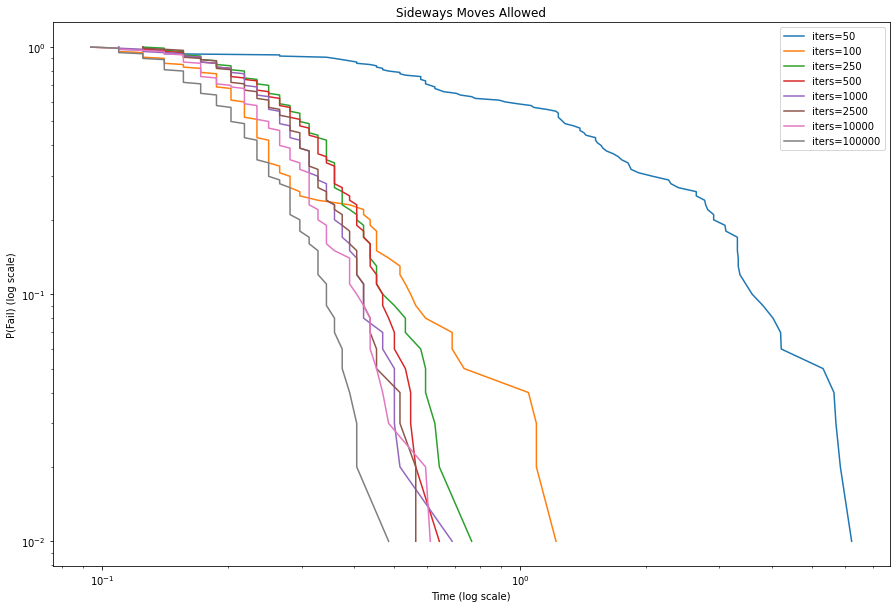

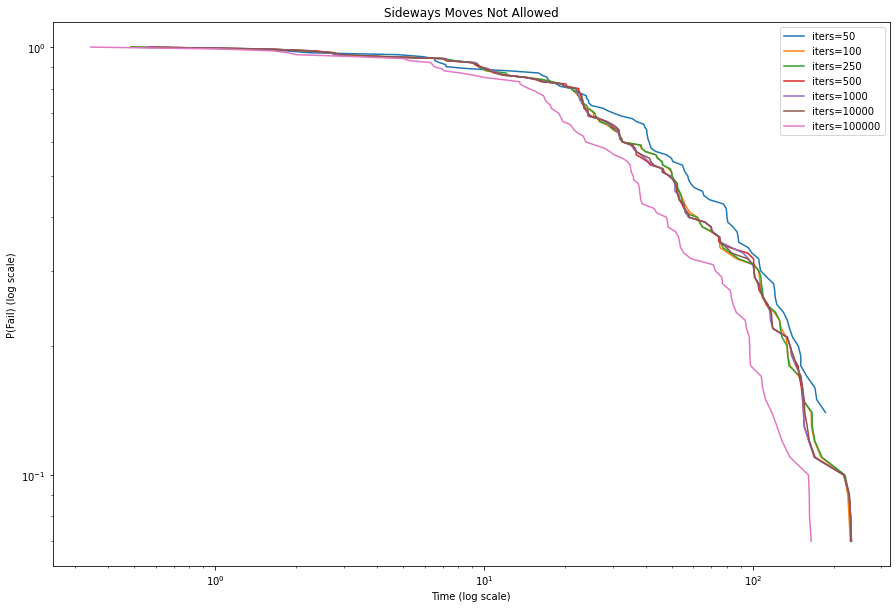

In [244]:

plot_time(yes_sideways_no_cache, \
            plot_type='loglog',\
            title="Sideways Moves Allowed",\
            plot_failure_rate=True,\
            legend_position='ax')


plot_time(no_sideways_no_cache, \
            plot_type='loglog',\
            title="Sideways Moves Not Allowed",\
            plot_failure_rate=True,\
            legend_position='ax')



Reading yes_sideways_no_cache_50.csv
Reading yes_sideways_no_cache_100.csv
Reading yes_sideways_no_cache_250.csv
Reading yes_sideways_no_cache_500.csv
Reading yes_sideways_no_cache_1000.csv
Reading yes_sideways_no_cache_10000.csv
Reading yes_sideways_no_cache_r10000.csv
Reading 100_sideways_no_cache_100000.csv
Reading no_sideways_no_cache_50.csv
Reading no_sideways_no_cache_100.csv
Reading no_sideways_no_cache_250.csv
Reading no_sideways_no_cache_500.csv
Reading no_sideways_no_cache_1000.csv
Reading no_sideways_no_cache_10000.csv
Reading 100_no_sideways_no_cache_early.csv


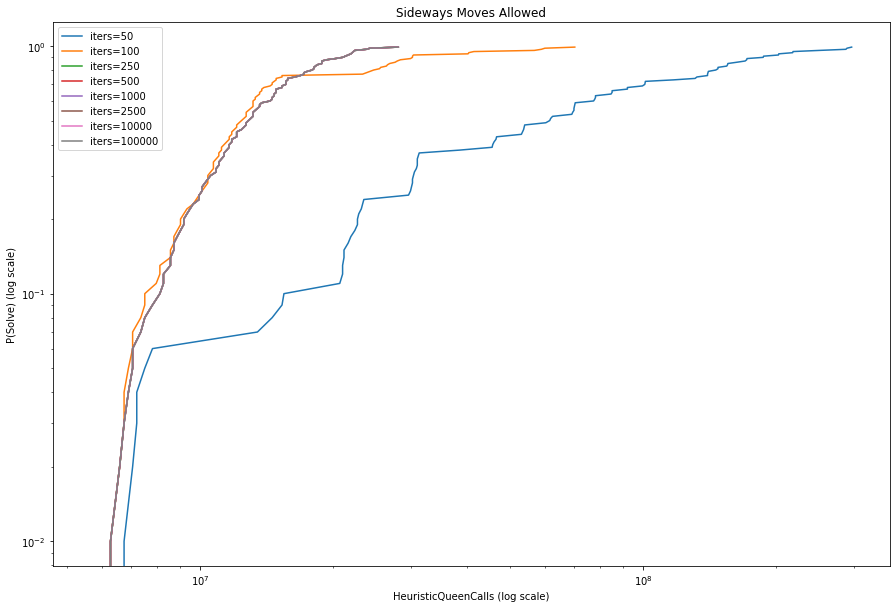

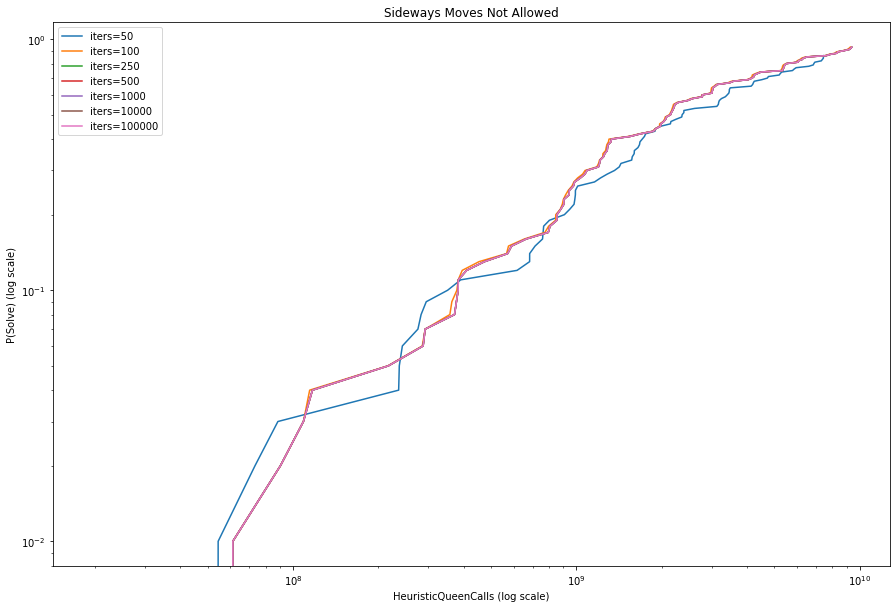

In [233]:
plot_operations(yes_sideways_no_cache, \
            plot_type='loglog',\
            title="Sideways Moves Allowed",\
            plot_failure_rate=False,\
            legend_position='ax')
plot_operations(no_sideways_no_cache, \
            plot_type='loglog',\
            title="Sideways Moves Not Allowed",\
            plot_failure_rate=False,\
            legend_position='ax')

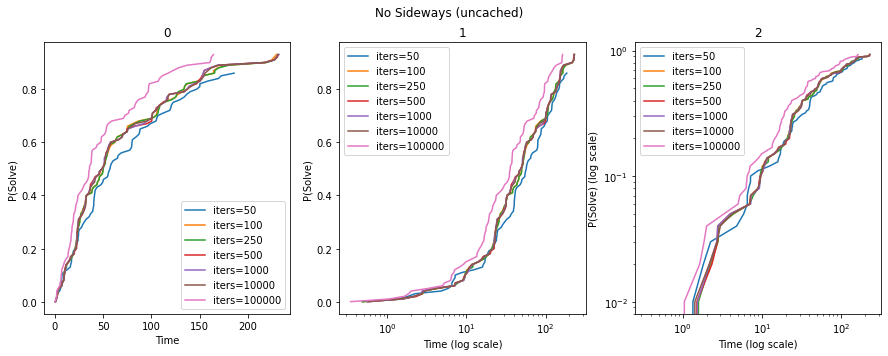

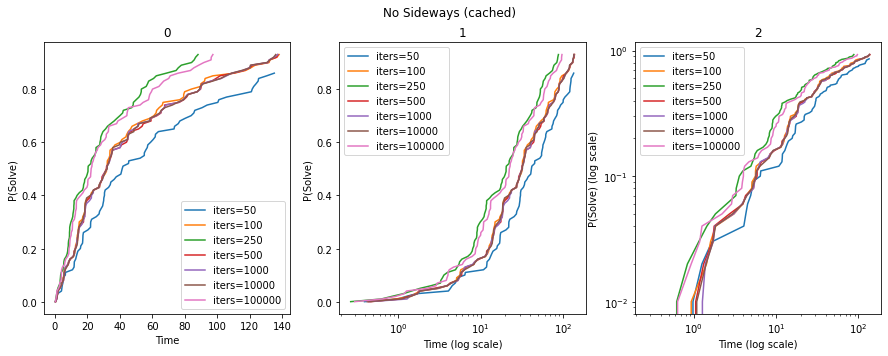

In [266]:

plot_time_all(no_sideways_no_cache, "No Sideways (uncached)", plot_failure_rate=False, legend_position='ax')
plot_time_all(no_sideways_yes_cache, "No Sideways (cached)", plot_failure_rate=False, legend_position='ax')

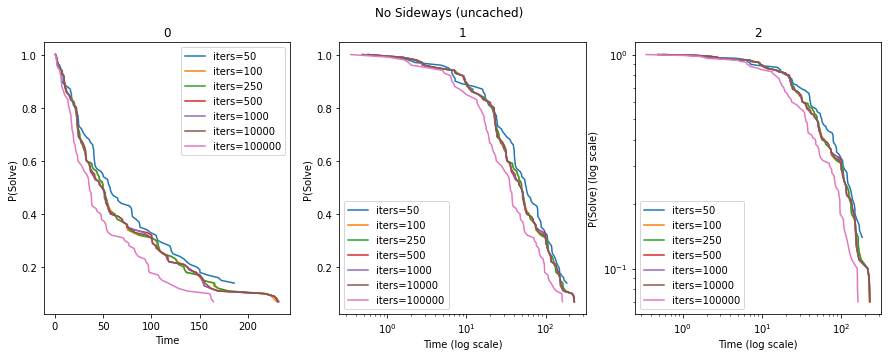

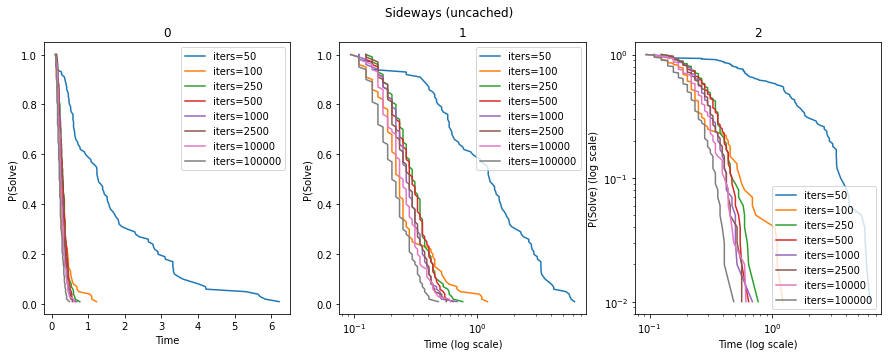

In [268]:
plot_time_all(no_sideways_no_cache, "No Sideways (uncached)", plot_failure_rate=True, legend_position='ax')
plot_time_all(yes_sideways_no_cache, "Sideways (uncached)", plot_failure_rate=True, legend_position='ax')